In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
# Creating list of playoff teams to focus on
teams_df = pd.read_csv(".\Resources\Teams.csv")
playoffs_df = pd.read_csv(".\Resources\PlayoffTeams.csv")

In [3]:
# clean up Teams dataframes to chosen years (2013-2015)
teams_df = teams_df.loc[teams_df['yearID'] > 2012]
playoffs_df = playoffs_df.loc[playoffs_df['yearID'] > 2012]

In [4]:
winners_df = playoffs_df[['teamIDwinner']].drop_duplicates()
losers_df = playoffs_df[['teamIDloser']].drop_duplicates()

In [5]:
playoff_count_df = playoffs_df['teamIDwinner'].append(playoffs_df['teamIDloser'])
playoff_count_df = playoff_count_df.value_counts()
playoff_count_df

KCA    7
SLN    6
PIT    4
LAN    4
SFN    4
NYN    3
CHN    3
BOS    3
DET    3
BAL    2
TBA    2
TOR    2
OAK    2
HOU    2
LAA    1
NYA    1
CLE    1
ATL    1
TEX    1
CIN    1
WAS    1
dtype: int64

In [6]:
playoff_count_df = playoffs_df['teamIDwinner'].append(playoffs_df['teamIDloser'])
playoff_count_df = playoff_count_df.value_counts()

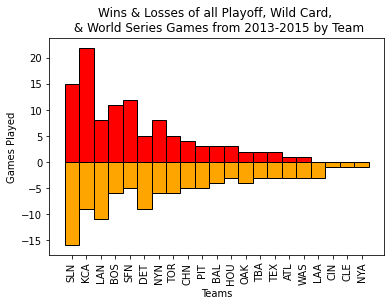

W-Win  W-Loss  L-Win  L-Loss  Total Wins  Total Losses  Total Games
Teams                                                                     
SLN     10.0     5.0    5.0    11.0        15.0          16.0         31.0
KCA     19.0     5.0    3.0     4.0        22.0           9.0         31.0
LAN      3.0     1.0    5.0    10.0         8.0          11.0         19.0
BOS     11.0     6.0    0.0     0.0        11.0           6.0         17.0
SFN     12.0     5.0    0.0     0.0        12.0           5.0         17.0
DET      3.0     2.0    2.0     7.0         5.0           9.0         14.0
NYN      7.0     2.0    1.0     4.0         8.0           6.0         14.0
TOR      3.0     2.0    2.0     4.0         5.0           6.0         11.0
CHN      4.0     1.0    0.0     4.0         4.0           5.0          9.0
PIT      1.0     0.0    2.0     5.0         3.0           5.0          8.0
BAL      3.0     0.0    0.0     4.0         3.0           4.0          7.0
HOU      1.0     0.0    2.0     3.0         3.0           3.0          6.0
OAK      0.0     0.0    2.0     4.0         2.0           4.0          6.0
TBA      1.0     0.0    1.0     3.0         2.0           3.0          5.0
TEX      0.0     0.0    2.0     3.0         2.0           3.0          5.0
ATL      0.0     0.0    1.0     3.0         1.0           3.0          4.0
WAS      0.0     0.0    1.0     3.0         1.0           3.0          4.0
LAA      0.0     0.0    0.0     3.0         0.0           3.0          3.0
CIN      0.0     0.0    0.0     1.0         0.0           1.0          1.0
CLE      0.0     0.0    0.0     1.0         0.0           1.0          1.0
NYA      0.0     0.0    0.0     1.0         0.0           1.0          1.0

In [7]:
# stacked bar graph for wins and loses per match up AND ratio of wins to total games played per year per team

wins_losses_df = playoffs_df.copy()

# Seperating out data by team for wins and losses

wins = wins_losses_df[["teamIDwinner", "wins",
                       "losses"]].rename(columns={"teamIDwinner":"Teams", "wins": "W-Win", "losses":"W-Loss"})

losses = wins_losses_df[["teamIDloser", "losses",
                         "wins"]].rename(columns={"teamIDloser":"Teams", "losses":"L-Win", "wins":"L-Loss"})

win_data = wins.groupby(["Teams"]).sum()

loss_data = losses.groupby(["Teams"]).sum()

games_df = pd.merge(win_data, loss_data, on="Teams", how="outer")

games_df = games_df.fillna(0)

games_df["Total Wins"] = games_df["W-Win"] + games_df["L-Win"]

games_df["Total Losses"] = games_df["W-Loss"] + games_df["L-Loss"]

games_df["Total Games"] = games_df["Total Wins"] + games_df["Total Losses"]

games_df.sort_values(by=["Total Games"], inplace=True, ascending=False)

# Bar chart

win_bar = games_df["Total Wins"]
loss_bar = games_df["Total Losses"]*(-1)

bars = np.add(win_bar, loss_bar).tolist()

r = np.arange(0,42,2)

names = games_df.index.values
width = 2

plt.bar(r, win_bar, color='red', edgecolor='black', width=width)
plt.bar(r, loss_bar, color='orange', edgecolor='black', width=width)

plt.xticks(r, names, rotation=90)
plt.xlabel("Teams")
plt.ylabel("Games Played")
plt.title("Wins & Losses of all Playoff, Wild Card, \n & World Series Games from 2013-2015 by Team")
plt.show()

# This is just a check. It provides the totals of all games per team. Since every match has a winner and a loser,
# the "Total Games" will be double the number of matches in the playoffs and WS between 2005-2015.
# games_df.sum()

games_df

In [8]:
#Create the teams_bridge table
teams_bridge = pd.read_csv(".\Resources\Teams_bridge_starter.csv")
teams_bridge.head()
teams_bridge =  teams_bridge[["TeamID", "City",
                       "Nickname"]]
teams_bridge.head()
# teams_bridge.to_csv("Resources/teams_bridge.csv", encoding="uTF8", index=False, header=True)

teams_df.count()
teams_bridge.count()

TeamID      152
City        152
Nickname    152
dtype: int64

In [9]:
# games_df.to_csv("Resources/games_df.csv", encoding="uTF8", index=True, header=True)


In [10]:
#Combine attendance files into one

attendance_2013 = pd.read_csv(".\Resources\Attendance_2013.csv")
attendance_2014 = pd.read_csv(".\Resources\Attendance_2014.csv")
attendance_2015 = pd.read_csv(".\Resources\Attendance_2015.csv")

# attendance_2013.head()
# attendance_2014.head()
attendance_2015.head()

# attendance_2013.count()
# attendance_2014.count()
# attendance_2015.count()
# #all counts are 30

TeamID  Attendance  Avg_Attendance
0    ARI     2080145           25681
1    ATL     2001392           24709
2    BAL     2281202           29246
3    BOS     2880694           35564
4    CHC     2919122           36039

In [11]:
merge_df = pd.merge(attendance_2013, attendance_2014, on="TeamID")
merge_df

merge_df = merge_df.rename(columns={"Attendance_x": "Attendance_2013", "Avg_Attendance_x": "Avg_Attendance_2013"})
merge_df = merge_df.rename(columns={"Attendance_y": "Attendance_2014", "Avg_Attendance_y": "Avg_Attendance_2014"})
merge_df.head()

merge_all_df = pd.merge(merge_df, attendance_2015, on="TeamID")
merge_all_df.head()

merge_all_df = merge_all_df.rename(columns={"Attendance": "Attendance_2015", "Avg_Attendance": "Avg_Attendance_2015"})
merge_all_df.head()

TeamID  Attendance_2013  Avg_Attendance_2013  Attendance_2014  \
0    ARI          2134895                26357          2073730   
1    ATL          2548679                31465          2354305   
2    BAL          2357561                29106          2464473   
3    BOS          2833333                34979          2956089   
4    CHC          2642682                32626          2652113   

   Avg_Attendance_2014  Attendance_2015  Avg_Attendance_2015  
0                25602          2080145                25681  
1                29065          2001392                24709  
2                30426          2281202                29246  
3                36495          2880694                35564  
4                32742          2919122                36039

In [12]:
#Clean merged file and export as CSV
merge_all_df.count()
merge_all_df.dropna(how='any')

# merge_all_df.to_csv("Resources/Attendance.csv", index=False, header=True)

TeamID  Attendance_2013  Avg_Attendance_2013  Attendance_2014  \
0     ARI          2134895                26357          2073730   
1     ATL          2548679                31465          2354305   
2     BAL          2357561                29106          2464473   
3     BOS          2833333                34979          2956089   
4     CHC          2642682                32626          2652113   
5     CHW          1768413                21832          1650821   
6     CIN          2492101                31151          2476664   
7     CLE          1572926                19419          1437393   
8     COL          2793828                34492          2680329   
9     DET          3083397                38067          2917209   
10    HOU          1651883                20394          1751829   
11    KCR          1750754                21614          1956482   
12    LAA          3019505                37278          3095935   
13    LAD          3743527                46216          3782337   
14    MIA          1586322                19584          1732283   
15    MIL          2531105                31248          2797384   
16    MIN          2477644                30588          2250606   
17    NYM          2135657                26366          2148808   
18    NYY          3279589                40489          3401624   
19    OAK          1809302                22337          2003628   
20    PHI          3012403                37190          2423852   
21    PIT          2256862                27862          2442564   
22    SDP          2166691                26749          2195373   
23    SEA          1761546                21747          2064334   
24    SFG          3369106                41087          3368697   
25    STL          3369769                41602          3540649   
26    TBR          1510300                18646          1446464   
27    TEX          3178273                38759          2718733   
28    TOR          2536562                31316          2375525   
29    WSN          2652422                32746          2579389   

    Avg_Attendance_2014  Attendance_2015  Avg_Attendance_2015  
0                 25602          2080145                25681  
1                 29065          2001392                24709  
2                 30426          2281202                29246  
3                 36495          2880694                35564  
4                 32742          2919122                36039  
5                 20381          1755810                21677  
6                 30576          2419506                29870  
7                 17746          1388905                17361  
8                 33090          2506789                30948  
9                 36015          2726048                33655  
10                21628          2153585                26587  
11                24154          2708549                33439  
12                38221          3012765                37195  
13                46696          3764815                46479  
14                21386          1752235                21633  
15                34536          2542558                31390  
16                27785          2220054                27408  
17                26528          2569753                31725  
18                41995          3193795                39430  
19                24736          1768175                21829  
20                29924          1831080                22606  
21                30155          2498596                30847  
22                27103          2459752                30367  
23                25486          2193581                27081  
24                41589          3375882                41678  
25                43712          3520889                43468  
26                17858          1287054                15322  
27                33565          2491875                30764  
28                29327          27948

In [13]:
#Graphs
beer_df = pd.read_csv(".\Resources\MLB Beer Prices.csv")
beer_df.head()


Year                  Team      Nickname       City   Price    Size   \
0  2013  Arizona Diamondbacks  Diamondbacks    Arizona     4.00      14   
1  2013        Atlanta Braves        Braves    Atlanta     7.25      16   
2  2013     Baltimore Orioles       Orioles  Baltimore     6.75      18   
3  2013        Boston Red Sox       Red Sox     Boston     7.25      12   
4  2013          Chicago Cubs          Cubs    Chicago     7.25      16   

    Price per Ounce   
0               0.29  
1               0.45  
2               0.38  
3               0.60  
4               0.45

In [14]:
beer_df.drop(beer_df[beer_df["Team"] == "MLB Average"].index, inplace = True)

In [15]:
# beer_df.to_csv("Resources/Beer_Price.csv", index=False, header=True)

In [16]:
#Clean up Parks_config
parks_config = pd.read_csv(".\Resources\Ballpark Database 2019 Final Files\ParkConfig - contains capacity.csv")

In [17]:
parks_config.head()
parks_config_final = parks_config.loc[parks_config['Year'] == 2013]
parks_config_final.head()

parkID                           Name  Year  Capacity
190  ANA01       Angel Stadium of Anaheim  2013     45505
191  ARL02  Rangers Ballpark in Arlington  2013     48114
192  ATL02                   Turner Field  2013     49586
193  BAL12    Oriole Park at Camden Yards  2013     45971
194  BOS07                    Fenway Park  2013     37499

In [18]:
# parks_config_final.to_csv("Resources/Parks_config.csv", index=False, header=True)

In [19]:
city_pop = pd.read_csv(".\\Resources\\US City Population.csv")
postal_codes = pd.read_csv(".\\Resources\\Postal_Codes.csv")

In [20]:
# Needed to add postal codes to city population to connect it with other tables that reference states as postal codes
merge_data = pd.merge(city_pop, postal_codes)
merge_data.head()

City     State  POPULATION_2010  POPULATION_2011  POPULATION_2012  \
0   New York  New York          8190209          8272948          8346693   
1    Buffalo  New York           261275           260701           260155   
2  Rochester  New York           210217           210491           210329   
3    Yonkers  New York           196407           197584           198057   
4   Syracuse  New York           145215           144526           144414   

   POPULATION_2013  POPULATION_2014  POPULATION_2015  POPULATION_2016  \
0          8396091          8433806          8463049          8469153   
1           260013           259548           258165           256816   
2           210179           209329           208561           207659   
3           198769           199367           199667           200077   
4           145044           144331           143816           143176   

   POPULATION_2017  POPULATION_2018  POPULATION_2019 Postal Code  
0          8437478          8390081          8336817          NY  
1           256301           255781           255284          NY  
2           206410           206004           205695          NY  
3           199873           199883           200370          NY  
4           142287           142745           142327          NY

In [21]:
# merge_data.to_csv("Resources/Updated_Pop.csv", index=False, header=True)

In [22]:
col_Names=["TeamID", "TeamName", "TotalGames", "BeerYear", "Price", "OuncePrice", "City", "Pop2013", "Pop2014","Pop2015", "ParkName", "Cap", "Att2013", "AV_Att2013", "Att2014", "AV_Att2014", "Att2015", "AV_Att2015"]
results = pd.read_csv(".\\_CODE\\new_results.csv",names=col_Names)
results = results.reset_index(drop=True)
results.head()

TeamID TeamName  TotalGames  BeerYear  Price  OuncePrice     City  Pop2013  \
0    ATL   Braves         4.0      2013   7.25        0.45  Atlanta   453990   
1    ATL   Braves         4.0      2014   7.25        0.45  Atlanta   453990   
2    ATL   Braves         4.0      2015   7.25        0.45  Atlanta   453990   
3    ATL   Braves         4.0      2016   7.75        0.48  Atlanta   453990   
4    ATL   Braves         4.0      2018   5.00        0.42  Atlanta   453990   

   Pop2014  Pop2015      ParkName    Cap  Att2013  AV_Att2013  Att2014  \
0   461154   468303  Turner Field  49586  2548679       31465  2354305   
1   461154   468303  Turner Field  49586  2548679       31465  2354305   
2   461154   468303  Turner Field  49586  2548679       31465  2354305   
3   461154   468303  Turner Field  49586  2548679       31465  2354305   
4   461154   468303  Turner Field  49586  2548679       31465  2354305   

   AV_Att2014  Att2015  AV_Att2015  
0       29065  2001392       24709  
1       29065  2001392       24709  
2       29065  2001392       24709  
3       29065  2001392       24709  
4       29065  2001392       24709

In [23]:
index_names = results[(results['TeamID'] == "NYA") & (results['ParkName'] == "Citi Field")].index 
results.drop(index_names, inplace = True)

index_names = results[(results['TeamID'] == "NYN") & (results['ParkName'] == "New Yankee Stadium")].index 
results.drop(index_names, inplace = True)

In [24]:
# results.to_csv("Resources/results_with_header.csv", index=False, header=True)